### Compute Storage and Vertically Averaged Saturated Hydraulic Conductivity

In [1]:
caltab = pd.DataFrame()

### Nr1

### Vcm

### P301

In [2]:
site = 'p301'
method = '7'
phi_o = 0.435 # porosity at the surface [1]
p = 4000 # porosity decay parameter [1/m]

In [3]:
import scipy.integrate as spint

In [4]:
def compute_total_porosity(x):
    phi_o = x.phi_o
    p = x.p
    sd = x.soil_depth
    
    poro = lambda z: phi_o * np.exp(-1*(z/p))
    
    phi,error = spint.quad(poro,0,sd)
    
    return phi

def compute_plant_porosity(x):
    phi_o = x.phi_o
    p = x.p
    sd = x.root_depth
    
    poro = lambda z: phi_o * np.exp(-1*(z/p))
    
    phi,error = spint.quad(poro,0,sd)
    
    return phi

def compute_mean_drainage(x):
    ksat_o = x.ksat # saturated hydologic conductivity at the surface [m/day]
    m = x.m # decay of ksat_o with depth [1/m]
    sd = x.soil_depth # soil depth [m]
    
    ksat = lambda z: ksat_o*np.exp(-1*(z/m))
    
    drain,error = spint.quad(ksat,0,sd)
    
    return drain/sd # divide the integral by the width of the integral to get the mean value.

def compute_fc_storage(x):
    '''From Dingman 6-19'''
    
    poro  = x.phi_plant # total porosity [m]
    pa = x.pa # air entry pressure [m]
    po = x.po # pore size index [1]
    const = 340. # pressure head of 340 cm
    const /= 100. # cm > m
    
    storage = poro * (np.abs(pa)/const)**(1/po) # storage in m
    
    return storage

def compute_wp_storage(x):
    '''From Dingman 6-20'''
    
    poro  = x.phi_plant # total porosity [m]
    pa = x.pa # air entry pressure [m]
    po = x.po # pore size index [1]
    const = 15000. # pressure head of 340 cm
    const /= 100. # cm > m
    
    storage = poro * (np.abs(pa)/const)**(1/po) # storage in m
    
    return storage

In [5]:
soils = pd.read_pickle('./data/soils_%s_smex%s.pcl'%(site,method))

In [6]:
soils

,combo,ksat,m,pa,po,m_def,ksat_def,po_def,pa_def,root_depth,soil_depth,m_scalar,ksat_scalar,po_scalar,pa_scalar
0,d1:s1,757.890,1.2548,0.050794,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,252.630,2.533,0.2330
1,d1:s2,757.890,1.2548,0.076191,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,252.630,2.533,0.3495
2,d1:s3,757.890,1.2548,0.101588,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,252.630,2.533,0.4660
3,d1:s4,757.890,1.2548,0.126985,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,252.630,2.533,0.5825
4,d1:s5,757.890,1.2548,0.152382,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,252.630,2.533,0.6990
5,d2:s1,1136.835,1.2548,0.050794,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,378.945,2.533,0.2330
6,d2:s2,1136.835,1.2548,0.076191,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,378.945,2.533,0.3495
7,d2:s3,1136.835,1.2548,0.101588,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,378.945,2.533,0.4660
8,d2:s4,1136.835,1.2548,0.126985,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,378.945,2.533,0.5825
9,d2:s5,1136.835,1.2548,0.152382,0.516732,0.4,3.0,0.204,0.218,8.503,12.503,3.137,378.945,2.533,0.6990


In [7]:
# compute actual parameters
#soils.m = soils.m_def * soils.m_scalar
#soils.ksat = soils.ksat_def * soils.ksat_scalar
#soils.po = soils.po_def * soils.po_scalar
#soils.pa = soils.pa_def * soils.pa_scalar

soils.po = 1./soils.po
soils['phi_o'] = phi_o
soils['p'] = p

In [8]:
soils.loc[soils.combo=='d3:s3',['m_def','ksat_def','po_def','pa_def','m_scalar','ksat_scalar','po_scalar','pa_scalar']]

,m_def,ksat_def,po_def,pa_def,m_scalar,ksat_scalar,po_scalar,pa_scalar
12,0.4,3.0,0.204,0.218,3.137,505.26,2.533,0.466


In [9]:
for key in ['m_def','ksat_def','po_def','pa_def','m_scalar','ksat_scalar','po_scalar','pa_scalar']:
    soils.__delitem__(key)

In [10]:
soils.head()

,combo,ksat,m,pa,po,root_depth,soil_depth,phi_o,p
0,d1:s1,757.89,1.2548,0.050794,1.935239,8.503,12.503,0.435,4000
1,d1:s2,757.89,1.2548,0.076191,1.935239,8.503,12.503,0.435,4000
2,d1:s3,757.89,1.2548,0.101588,1.935239,8.503,12.503,0.435,4000
3,d1:s4,757.89,1.2548,0.126985,1.935239,8.503,12.503,0.435,4000
4,d1:s5,757.89,1.2548,0.152382,1.935239,8.503,12.503,0.435,4000


In [11]:
soils.ksat.unique()

array([  757.89 ,  1136.835,  1515.78 ,  1894.725,  2273.67 ])

In [12]:
soils.pa.unique()

array([ 0.050794,  0.076191,  0.101588,  0.126985,  0.152382])

In [13]:
soils['phi_plant'] = soils.apply(compute_plant_porosity, axis=1)
soils['phi_total'] = soils.apply(compute_total_porosity, axis=1)
soils['drainage'] = soils.apply(compute_mean_drainage,axis=1) # mean soil column Ksat
soils['fc_storage'] = soils.apply(compute_fc_storage, axis=1)
soils['wp_storage'] = soils.apply(compute_wp_storage,axis=1)
soils['PAWS'] = soils.fc_storage - soils.wp_storage # dingman 6-21

In [14]:
soils.columns

Index([u'combo', u'ksat', u'm', u'pa', u'po', u'root_depth', u'soil_depth',
       u'phi_o', u'p', u'phi_plant', u'phi_total', u'drainage', u'fc_storage',
       u'wp_storage', u'PAWS'],
      dtype='object')

In [15]:
soils.to_pickle('./data/soils_%s_smex%s_storage_drainage.pcl'%(site,method))

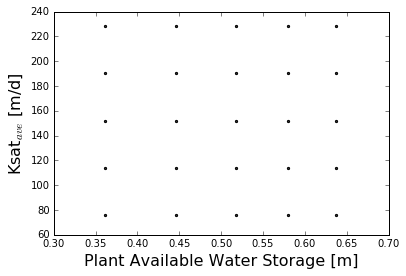

In [16]:
plt.scatter(soils.PAWS,soils.drainage,s=5,c='0.2')
plt.xlabel('Plant Available Water Storage [m]', fontsize=16)
plt.ylabel('Ksat$_{ave}$ [m/d]', fontsize=16)

## Print Values for the calibration table

In [52]:
caltab = caltab.append(soils.loc[soils.combo == 'd3:s3'])

In [56]:
caltab.index = ['nr1','vcm','p301']

In [58]:
caltab.sort_index(ascending=True,inplace=True)

In [59]:
caltab

,combo,ksat,m,pa,po,root_depth,soil_depth,phi_o,p,phi_plant,phi_total,drainage,fc_storage,wp_storage,PAWS,site
nr1,d3:s3,20.04900,4.9592,0.007120,30.640071,3.240,7.240,0.477,4000,1.544854,3.450356,10.543430,1.263144,1.116292,0.146852,nr1
p301,d3:s3,1515.78000,1.2548,0.101588,1.935239,8.503,12.503,0.435,4000,3.694876,5.430314,152.116391,0.602243,0.085104,0.517139,p301
vcm,d3:s3,1075.13559,7.6096,0.014824,1.345214,4.814,8.814,0.435,4000,2.092830,3.829869,636.734726,0.036812,0.002205,0.034607,vcm


### After this is scratch